In [2]:
import scipy.io

data = scipy.io.loadmat('../coursera-ml-master/matlab/ex3data1.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [3]:
X = data['X']
y = data['y']
print X.shape
print y.shape
print set(y.flatten())  # 10 is used for digit 0
y[y == 10] = 0
print set(y.flatten())

(5000, 400)
(5000, 1)
set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


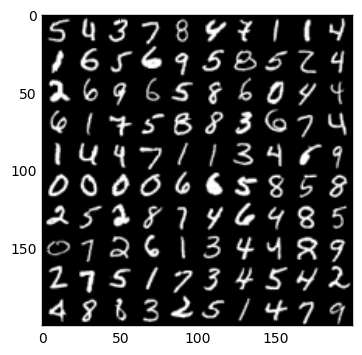

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
% matplotlib inline

im = Image.new('I', (200, 200))
np.random.seed(1234)
for i, rowid in enumerate(np.random.randint(0, 5000, 100)):
    im.paste(Image.fromarray(X[rowid, :].reshape((20, 20)).T * 256), ((i / 10) * 20, (i % 10) * 20))
plt.imshow(im)

In [5]:
@np.vectorize
def sigmoid(z):
    ### YOUR CODE HERE ###
    return 1 / (1 + np.exp(-z))
    ######################


def cost(theta, X, y, lambda_):
    # Treat theta as a row vector in this assignment!
    ### YOUR CODE HERE ###
    m, _ = X.shape
    theta = np.array([theta]).T
    J=0
    h = sigmoid(np.dot(X, theta))   
    J = -(np.dot(y.T,np.log(h)) + np.dot((1-y).T, np.log(1-h))) + (lambda_ * (np.dot(theta.T,theta) - theta[0]**2))/2
    return J[0]/m
    ######################


def gradient(theta, X, y, lambda_):
    # Treat theta as a row vector in this assignment!
    ### YOUR CODE HERE ###
    m, _ = X.shape
    theta = np.array([theta]).T
    grad = np.zeros(theta.shape)
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T,(h - y))
    grad[1:] = grad[1:m] + (lambda_*theta[1:m])
    return np.reshape(grad.T/m,(401,))
    ######################

In [6]:
from scipy.optimize import fmin_bfgs

def one_vs_all(X, y, num_labels, lambda_):
    m, n = X.shape
    X = np.column_stack((np.ones((m, 1)), X))
    thetas = np.zeros((num_labels, n + 1))
    for i in range(num_labels):
        yi = (y == i).astype(int)
        theta = fmin_bfgs(lambda t: cost(t, X, yi, lambda_),
                          np.zeros(n + 1),
                          lambda t: gradient(t, X, yi, lambda_))
        thetas[i, :] = theta
    return thetas

num_labels = 10
lambda_ = 0.1
thetas = one_vs_all(X, y, num_labels, lambda_)

Optimization terminated successfully.
         Current function value: 0.008583
         Iterations: 288
         Function evaluations: 289
         Gradient evaluations: 289
Optimization terminated successfully.
         Current function value: 0.013128
         Iterations: 286
         Function evaluations: 287
         Gradient evaluations: 287
Optimization terminated successfully.
         Current function value: 0.050810
         Iterations: 439
         Function evaluations: 440
         Gradient evaluations: 440
Optimization terminated successfully.
         Current function value: 0.057612
         Iterations: 424
         Function evaluations: 425
         Gradient evaluations: 425
Optimization terminated successfully.
         Current function value: 0.033075
         Iterations: 396
         Function evaluations: 397
         Gradient evaluations: 397
Optimization terminated successfully.
         Current function value: 0.054466
         Iterations: 433
         Function ev

In [7]:
def predict(theta, X):
    # Treat theta as a row vector in this assignment!
    m, n = X.shape
    X = np.column_stack((np.ones((m, 1)), X))
    return sigmoid(np.dot(X, theta.T))

def predict_one_vs_all(thetas, X):
    '''Returns predicted digit for each row of X'''
    ### YOUR CODE HERE ###
    pre = predict(thetas,X)
    result = []
    for i in range(len(pre)):
        result.append(np.argmax(pre[i]))
        
    return result
    ######################


predictions = predict_one_vs_all(thetas, X)
print 'training set accuracy = %.1f%%' % (
    100.0 * sum(p == y_ for p, y_ in zip(predictions, y.flatten())) / len(predictions))

training set accuracy = 96.5%
